<a id="3"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [23]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle


<a id="4"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

In [24]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities",
                                             other))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities", other))
        
for safe in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/safe_driving", 
                                            safe))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/safe_driving",
                           safe))
        
for talking in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/talking_phone", 
                                               talking))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/talking_phone",
                           talking))
        
for text in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/texting_phone",
                                            text))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/texting_phone",
                           text))
        
for turn in os.listdir("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/turning",
                                            turn))
        print(os.path.join("/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/turning", 
                           turn))
    
    

/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_11798.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_1493.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_11997.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/2019-04-2417-16-29.png
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_15918.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_12736.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehaviorProject/Driver-Behavior-Dataset/other_activities/img_10647.jpg
/Users/prajwalgowdakr/Desktop/fullstack/DriverBehavior/DriverBehavio

In [25]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

Number of samples in (Class = Other) =  808
Number of samples in (Class = Safe Driving) =  1068
Number of samples in (Class = Talking Phone) =  957
Number of samples in (Class = Texting Phone) =  431
Number of samples in (Class = Turning) =  675


In [26]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

606.0 161.60000000000002 40.400000000000006
801.0 213.60000000000002 53.400000000000006
717.75 191.4 47.85
323.25 86.2 21.55
506.25 135.0 33.75


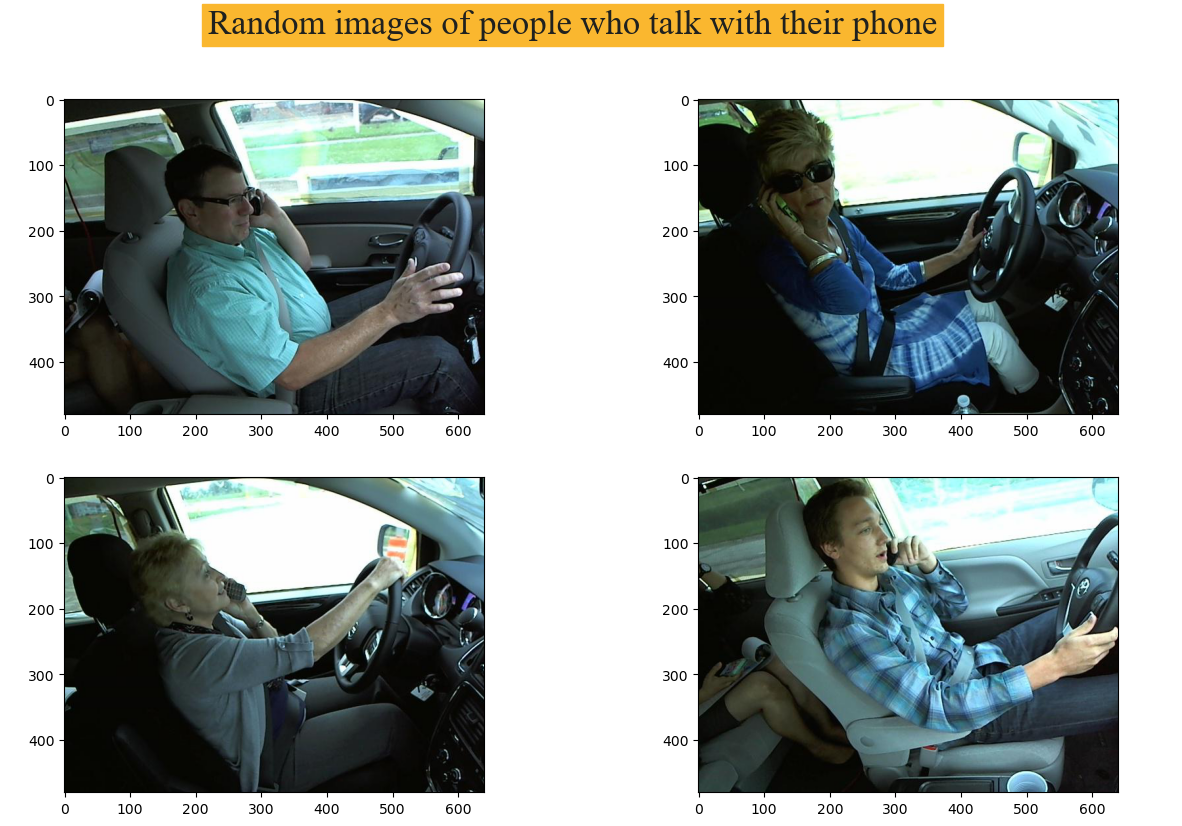

In [27]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'


plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()